In [1]:
# Dependencies
import tweepy
import csv
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import datetime
import os
from pathlib import Path

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



In [2]:

# Twitter API Keys
access_token  = '1851468854-nwscZLexKtuaeZ7rh3joQWGxzLDtryQJXT33BO9'
access_token_secret  = 'WWRMgXdvxAVUPCKytZpHxioWs4vHy2F8vcqRpYR7QoxOK'
consumer_key= '0TkY9VsX7GL64LwhZekgVcHfX'
consumer_secret= 'NPvEzfaPPlybcG70Bvu9hg6qEBKL6YuCwM1H51jjZ4epSKG6LM'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#function used to save the .csv file and png file
def save_output(filename,df,plt):
    csvPath=os.path.join("Output","data",filename)
    df.to_csv(csvPath+".csv")
    plotPath=os.path.join("Output","plots",filename)
    plt.savefig(plotPath)
    return plotPath

In [4]:
#function to return date of the tweet
def return_date(df):
    date_rep=df["Date"].max()
    #date_rep=datetime.datetime.fromtimestamp(int(date_rep).strftime('%Y-%m-%d %H:%M:%S'))
    new_date=date_rep.split(" ")
    mod_date=new_date[1]+new_date[2]+new_date[5]
    return mod_date
    

In [5]:
#function to plot the sentiment analysis
def plot_sent(df,sent_user):
    #set x axis as the array with values from 0 to length of df["Compound]. for eg: [0,1,2.....,len-1]
    plt.plot(np.arange(len(df["Compound"])),
         df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8, label=sent_user)
    date_rep=return_date(df)
    # # Incorporate the other graph properties
    plt.title("Sentiment Analysis of Tweets (%s)" % (date_rep))
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    plt.grid(True)
    plt.legend(loc = 'best',bbox_to_anchor=(1, 0.5), frameon=True)
    return plt
  

In [ ]:
#bot name
target_term = "#amfromBot"

# Opening message
print("Sentiment Analysis Begins.....")

tweet_id=[]
tweet_path=os.path.join("Output","Tweet_id.csv")
tweet_file=Path(tweet_path)
#check whether file exist. if yes store already replied tweets from Tweet_id.csv.
if tweet_file.is_file():
    tweet_idf=pd.read_csv(tweet_file)
    for row in tweet_idf.values:
        tweet_id.append(row.tolist()[0])
else:
    #if first time running code, tweet_id will be null
    tweet_id=[]

    
# Create Analyse Function
def Analyse():
    #search for #amfromBot
    public_tweets = api.search(target_term, count=10,result_type="recent")
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:
        #get username and search term in the tweet
        user_name=tweet["user"]["screen_name"]
        bot=tweet["text"].split("@")
        sentiments=[]
        try:
            #check if tweet already replied. Reply only if tweet encountering for first time
            if tweet["id"] not in tweet_id:
                #set term on which analysis is to be prepared(eg:CNN)
                sent_user="@"+bot[1]
                sent_tweets = api.user_timeline(sent_user, count=100)
                print("Performing Sentiment Analysis on :"+sent_user)
                for sent in sent_tweets:
                    text=sent["text"]
                    
                    # Run Vader Analysis on each tweet
                    compound = analyzer.polarity_scores(text)["compound"]
                    
                    pos = analyzer.polarity_scores(text)["pos"]
                    
                    neu = analyzer.polarity_scores(text)["neu"]
                    
                    neg = analyzer.polarity_scores(text)["neg"]
                    
                    # Add each value to the appropriate array
                    sentiments.append({"User": sent_user,
                               "text":text,
                           "Date": sent["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg
                           })

                print("Completed Sentiment Analysis on :"+sent_user)
                #create dataframe
                df=pd.DataFrame(sentiments)
                #call plot function
                plt=plot_sent(df,sent_user)
                #call date function
                date_rep=return_date(df)
                #set filename and path
                filename="Sentiment Analysis1"+sent_user+"("+date_rep+")"
                filepath=save_output(filename,df,plt)
                #Reply to user_name 
                #api.update_with_media(filepath+".png","New Tweet Sentiment Analysis " +sent_user+  " (Thanks @"+user_name+")",in_reply_to_status_id=tweet["id"])
                plt.show()
                #append the replied tweet id and save it to csv file
                tweet_id.append(tweet["id"])
                tweet_df=pd.DataFrame(tweet_id)
                tweet_df.to_csv(tweet_file,header=False,index=False)
                #clear plt
                plt.clf()
            else:
                print("Tweet already analysed, skipping.........")
        except Exception as e:            
            print("Exception Raised. Reason:........ ",e)
    #return the list
    return sentiments



Sentiment Analysis Begins.....


Performing Sentiment Analysis on :@LFC
Completed Sentiment Analysis on :@LFC


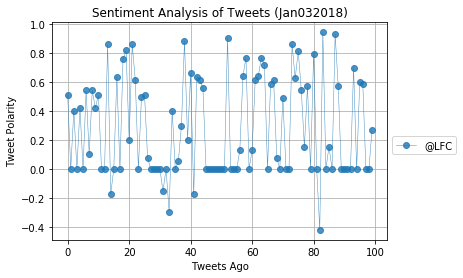

Performing Sentiment Analysis on :@Marvel
Completed Sentiment Analysis on :@Marvel


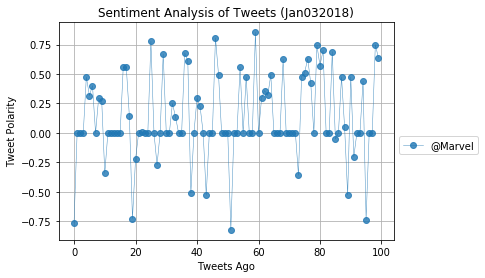

Performing Sentiment Analysis on :@nynjpaweather
Completed Sentiment Analysis on :@nynjpaweather


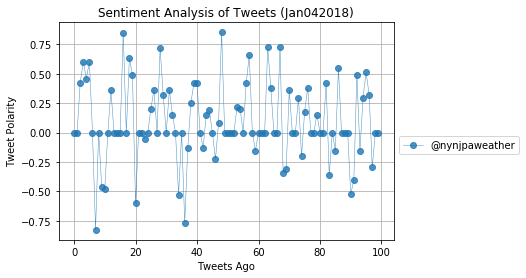

Performing Sentiment Analysis on :@TheEllenShow
Completed Sentiment Analysis on :@TheEllenShow


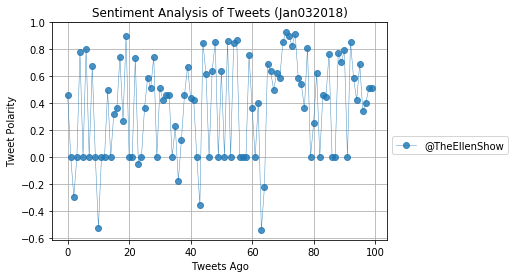

Performing Sentiment Analysis on :@realDonaldTrump
Completed Sentiment Analysis on :@realDonaldTrump


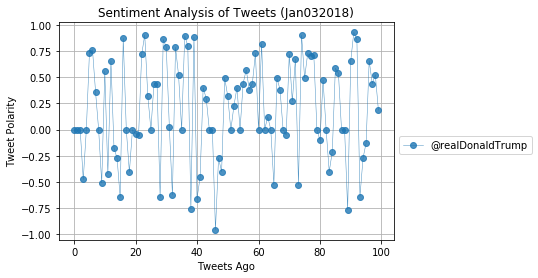

Performing Sentiment Analysis on :@CNN
Completed Sentiment Analysis on :@CNN


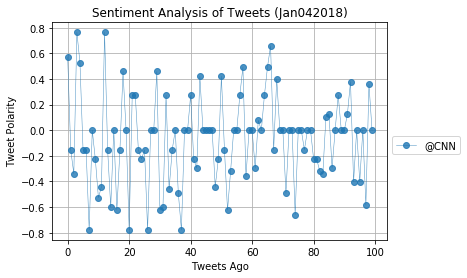

Performing Sentiment Analysis on :@CNN
Completed Sentiment Analysis on :@CNN


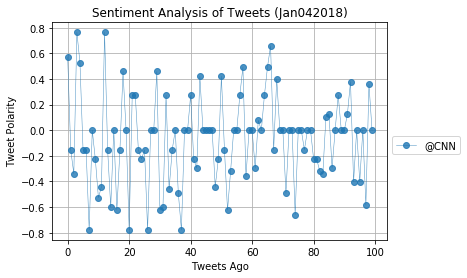

In [ ]:
counter = 1
# Infinite loop
while(counter < 5):
    #call Analyse function
    sen=Analyse()
    
    # Once tweeted, wait 300 seconds before doing anything else
    time.sleep(300)
    # Add 1 to the counter prior to re-running the loop
    counter = counter + 1